In [27]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
salary_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Data%20Science%20Jobs%20Salaries%20Dataset/Data%20Science%20Jobs%20Salaries.csv")
salary_data["work_year"] = salary_data["work_year"].str.replace(r'\D', '').astype(int)
salary_data

<ipython-input-28-447fd9264c23>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  salary_data["work_year"] = salary_data["work_year"].str.replace(r'\D', '').astype(int)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
salary_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,245.000000,2.450000e+02,245.000000,245.000000
mean,2020.730612,5.025418e+05,99868.012245,69.183673
std,0.444550,2.276230e+06,83983.326949,37.593421
min,2020.000000,4.000000e+03,2876.000000,0.000000
25%,2020.000000,6.000000e+04,45896.000000,50.000000
50%,2021.000000,1.030000e+05,81000.000000,100.000000
75%,2021.000000,1.740000e+05,130000.000000,100.000000
max,2021.000000,3.040000e+07,600000.000000,100.000000


In [30]:
print(salary_data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [31]:
unique_title = salary_data['job_title'].unique()
unique_title_count = salary_data['job_title'].nunique()
print(unique_title_count)
print(unique_title)

43
['Data Science Consultant' 'Data Scientist' 'Head of Data Science'
 'Head of Data' 'Machine Learning Engineer' 'Data Analytics Manager'
 'Research Scientist' 'Data Analyst' 'Data Engineer'
 'Data Science Engineer' 'Manager Data Science' 'Data Engineering Manager'
 'AI Scientist' '3D Computer Vision Researcher' 'ML Engineer'
 'Applied Data Scientist' 'Director of Data Science'
 'Data Analytics Engineer' 'Lead Data Analyst' 'BI Data Analyst'
 'Machine Learning Scientist' 'Machine Learning Infrastructure Engineer'
 'Marketing Data Analyst' 'Lead Data Engineer'
 'Director of Data Engineering' 'Computer Vision Software Engineer'
 'Financial Data Analyst' 'Cloud Data Engineer' 'Principal Data Analyst'
 'Big Data Architect' 'Lead Data Scientist' 'Data Architect'
 'Big Data Engineer' 'Staff Data Scientist' 'Data Science Manager'
 'Business Data Analyst' 'Principal Data Scientist'
 'Computer Vision Engineer' 'Product Data Analyst'
 'Principal Data Engineer' 'Finance Data Analyst'
 'Applied M

Text(0, 0.5, 'Job Titles')

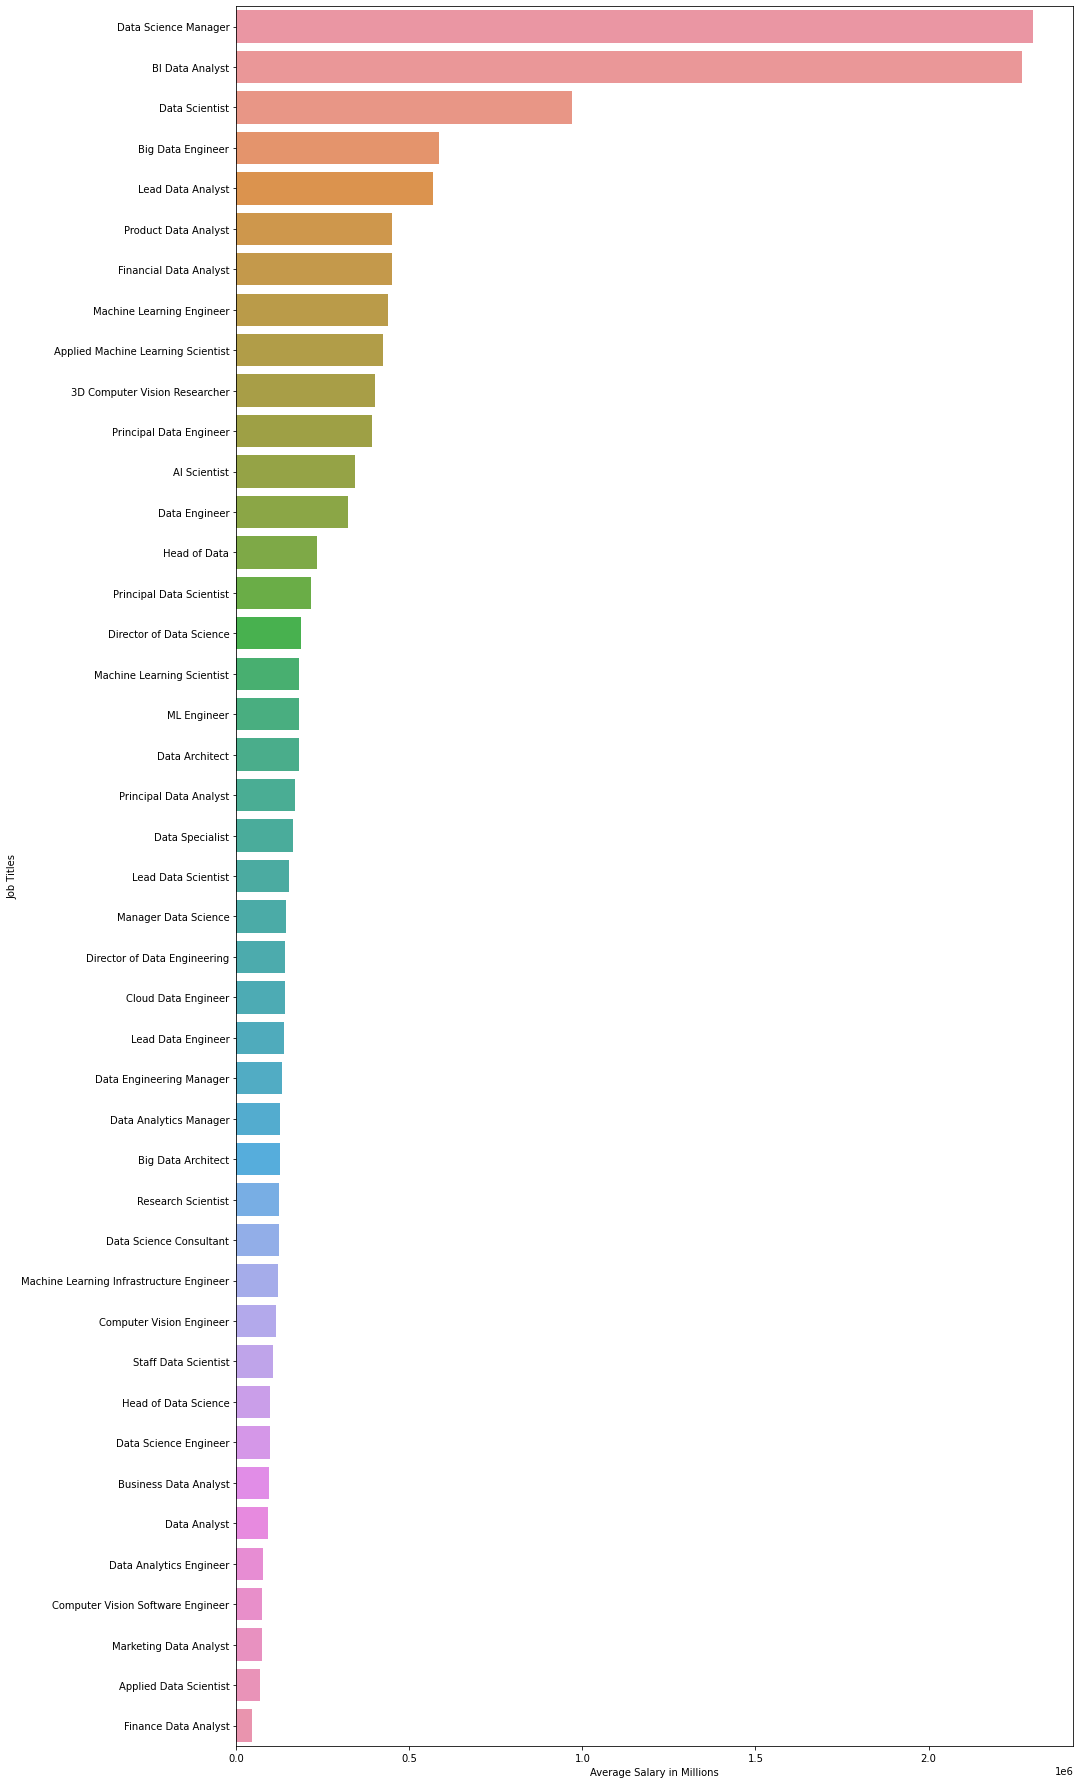

In [32]:
plt.figure(figsize=(15, 32))

job_salaries = salary_data.groupby(['job_title'])['salary'].mean().sort_values(ascending=False)
title = [ tit for tit in job_salaries.index]
sns.barplot(x=job_salaries, y=title)
plt.xlabel('Average Salary in Millions')
plt.ylabel('Job Titles')

In [33]:
job_sal = ['job_title' ,'salary_in_usd', 'company_location', 'work_year']
new_salary_data = salary_data[job_sal]

data_scientist = salary_data.loc[salary_data['job_title'] == 'Data Scientist']
data_scientist_sal = data_scientist[job_sal]

salary_dat_sci = data_scientist_sal.groupby(['company_location', 'work_year'])['salary_in_usd'].sum().sort_values(ascending=False)


for titles in unique_title:
    salaries = new_salary_data.loc[new_salary_data['job_title'] == titles]
    salary_list_titles = salaries.sort_values(['salary_in_usd'], ascending=False)
    print(salary_list_titles)

                   job_title  salary_in_usd company_location  work_year
14   Data Science Consultant         103000               US       2020
157  Data Science Consultant          90000               US       2021
45   Data Science Consultant          77481               DE       2021
115  Data Science Consultant          77481               DE       2021
145  Data Science Consultant          70329               ES       2021
0    Data Science Consultant          64369               DE       2021
172  Data Science Consultant           5707               IN       2020
          job_title  salary_in_usd company_location  work_year
240  Data Scientist         412000               US       2020
87   Data Scientist         165000               US       2021
188  Data Scientist         160000               US       2021
13   Data Scientist         150000               US       2021
137  Data Scientist         147000               US       2021
232  Data Scientist         138350            

In [34]:
unique_location = salary_data['company_location'].unique()
loc_count = salary_data['company_location'].nunique()
print(unique_location)
print(f'The number of unique location is {loc_count}')

['DE' 'US' 'RU' 'FR' 'AT' 'CA' 'UA' 'NG' 'IN' 'ES' 'PL' 'GB' 'PT' 'DK'
 'SG' 'MX' 'TR' 'NL' 'AE' 'JP' 'CN' 'HU' 'KE' 'CO' 'NZ' 'IR' 'CL' 'PK'
 'BE' 'GR' 'SI' 'BR' 'CH' 'IT' 'MD' 'LU' 'VN' 'AS' 'HR' 'IL' 'MT']
The number of unique location is 41


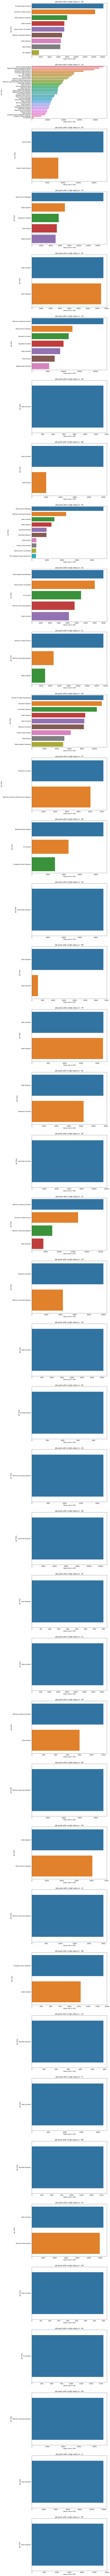

In [35]:
fig, ax = plt.subplots(41, 1, figsize=(10, 350));


for locations, axe in zip(unique_location, ax):
    company_loc = salary_data['company_location'].isin([locations])
    new_sal_dat = new_salary_data[company_loc]
    salaries = new_sal_dat.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
    job_tit = [sal for sal in salaries.index]
    sns.barplot(x=salaries, y=job_tit, ax=axe)
    axe.set_title(f'Job posts with a high salary in - {locations}')
    axe.set_xlabel("Salary rate in USD")
    axe.set_ylabel("Job Titles")

In [37]:
employment = ['job_title', 'employment_type', 'salary_in_usd']
employ_data = salary_data[employment]
unique_employ = salary_data['employment_type'].unique()

for employ in unique_employ:
    employments = employ_data.loc[employ_data['employment_type'] == employ]
    employs = employments.sort_values(['salary_in_usd'], ascending = False)
    print(employs)

                              job_title employment_type  salary_in_usd
191             Principal Data Engineer              FT         600000
63               Financial Data Analyst              FT         450000
6                    Research Scientist              FT         450000
237  Applied Machine Learning Scientist              FT         423000
240                      Data Scientist              FT         412000
..                                  ...             ...            ...
172             Data Science Consultant              FT           5707
153                      Data Scientist              FT           5695
218                      Data Scientist              FT           4000
147                       Data Engineer              FT           4000
156                      Data Scientist              FT           2876

[231 rows x 3 columns]
                         job_title employment_type  salary_in_usd
105                  Data Engineer              PT        

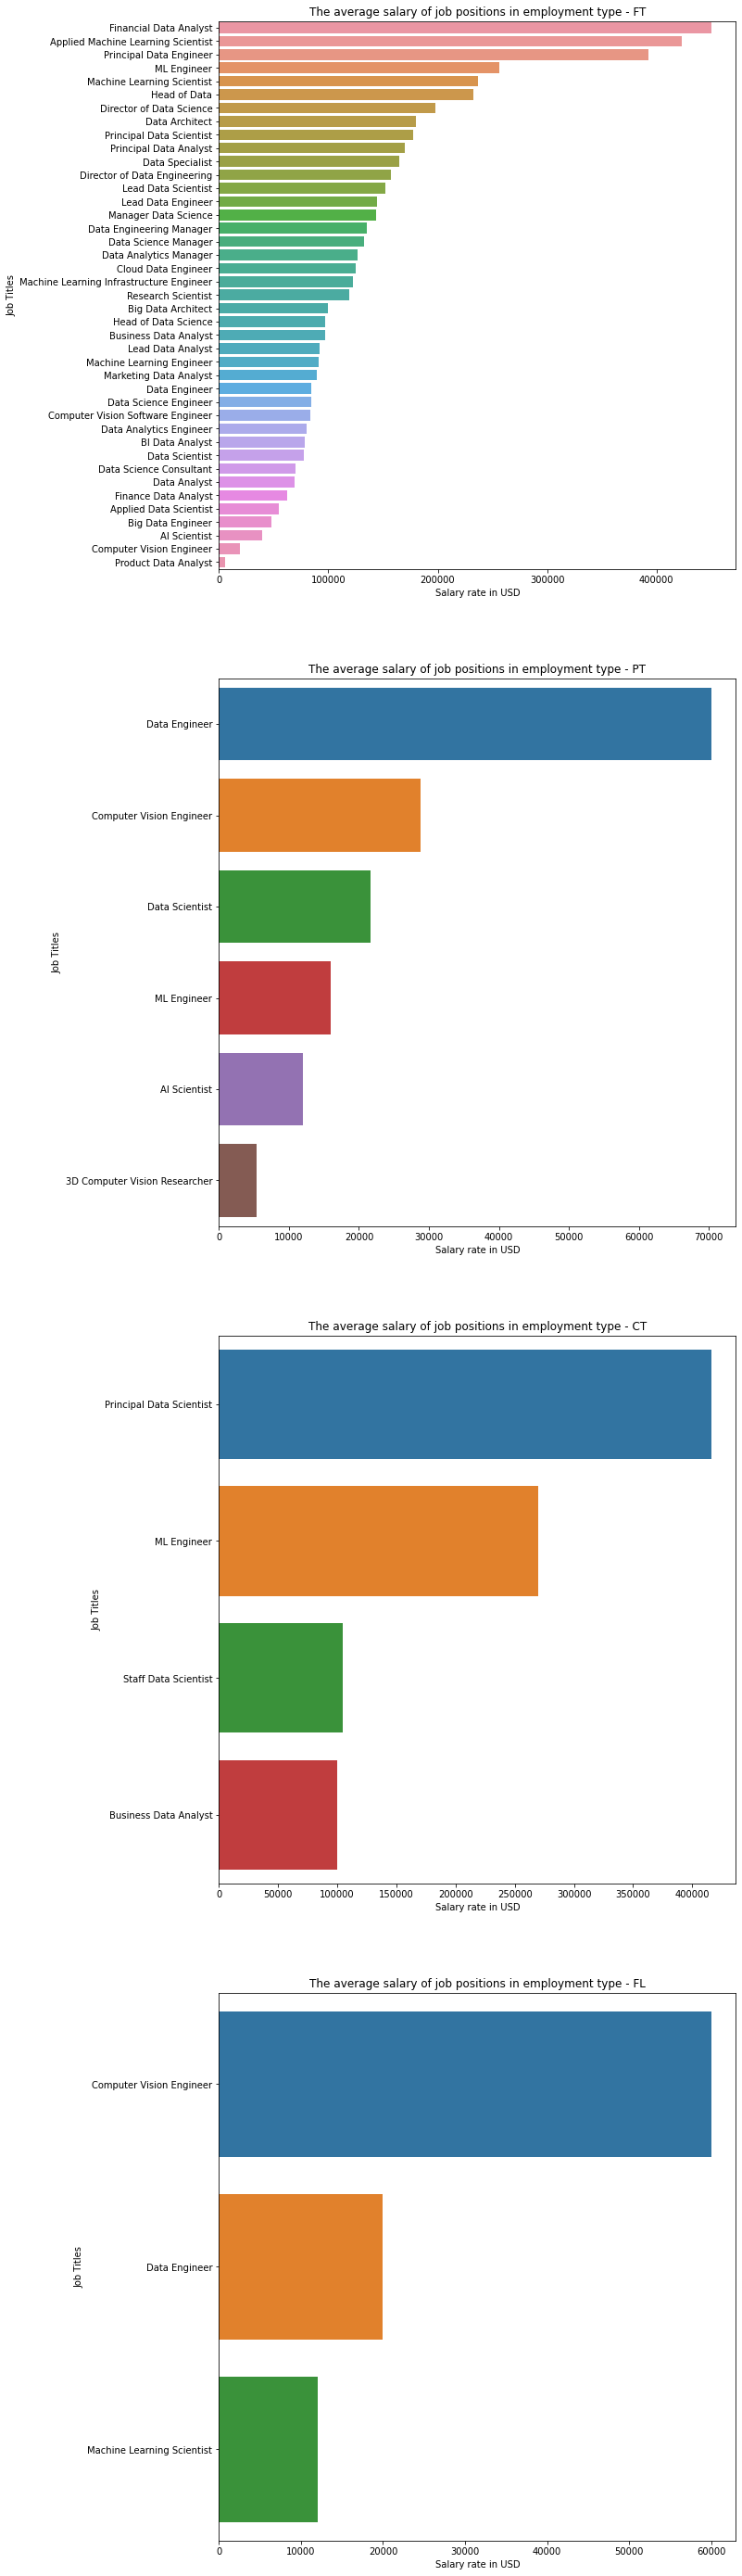

In [38]:
fig, ax = plt.subplots(4, 1, figsize=(10, 50));


for emp, axe in zip(unique_employ, ax):
    emplo = salary_data['employment_type'].isin([emp])
    new_employ_data = employ_data[emplo]
    grouped_employ = new_employ_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
    job_title2 = [jt for jt in grouped_employ.index]
    sns.barplot(x=grouped_employ, y=job_title2, ax=axe)
    axe.set_title(f'The average salary of job positions in employment type - {emp}')
    axe.set_xlabel("Salary rate in USD")
    axe.set_ylabel("Job Titles")

In [39]:
experience_level = ['job_title', 'experience_level', 'salary_in_usd']
experience_data = salary_data[experience_level]
unique_exp_lvl = salary_data['experience_level'].unique()

for xp in unique_exp_lvl:
    exper = experience_data.loc[experience_data['experience_level'] == xp]
    exper_sorted = exper.sort_values(['salary_in_usd'], ascending = False)
    print(exper_sorted)

                             job_title experience_level  salary_in_usd
29           Machine Learning Engineer               EN         250000
44          Machine Learning Scientist               EN         225000
33           Machine Learning Engineer               EN         138000
4            Machine Learning Engineer               EN         125000
242                     Data Scientist               EN         105000
243              Business Data Analyst               EN         100000
106                 Research Scientist               EN         100000
112                     Data Scientist               EN         100000
85                        Data Analyst               EN          91000
17                        Data Analyst               EN          90000
157            Data Science Consultant               EN          90000
76                      Data Scientist               EN          90000
114          Machine Learning Engineer               EN          85000
28    

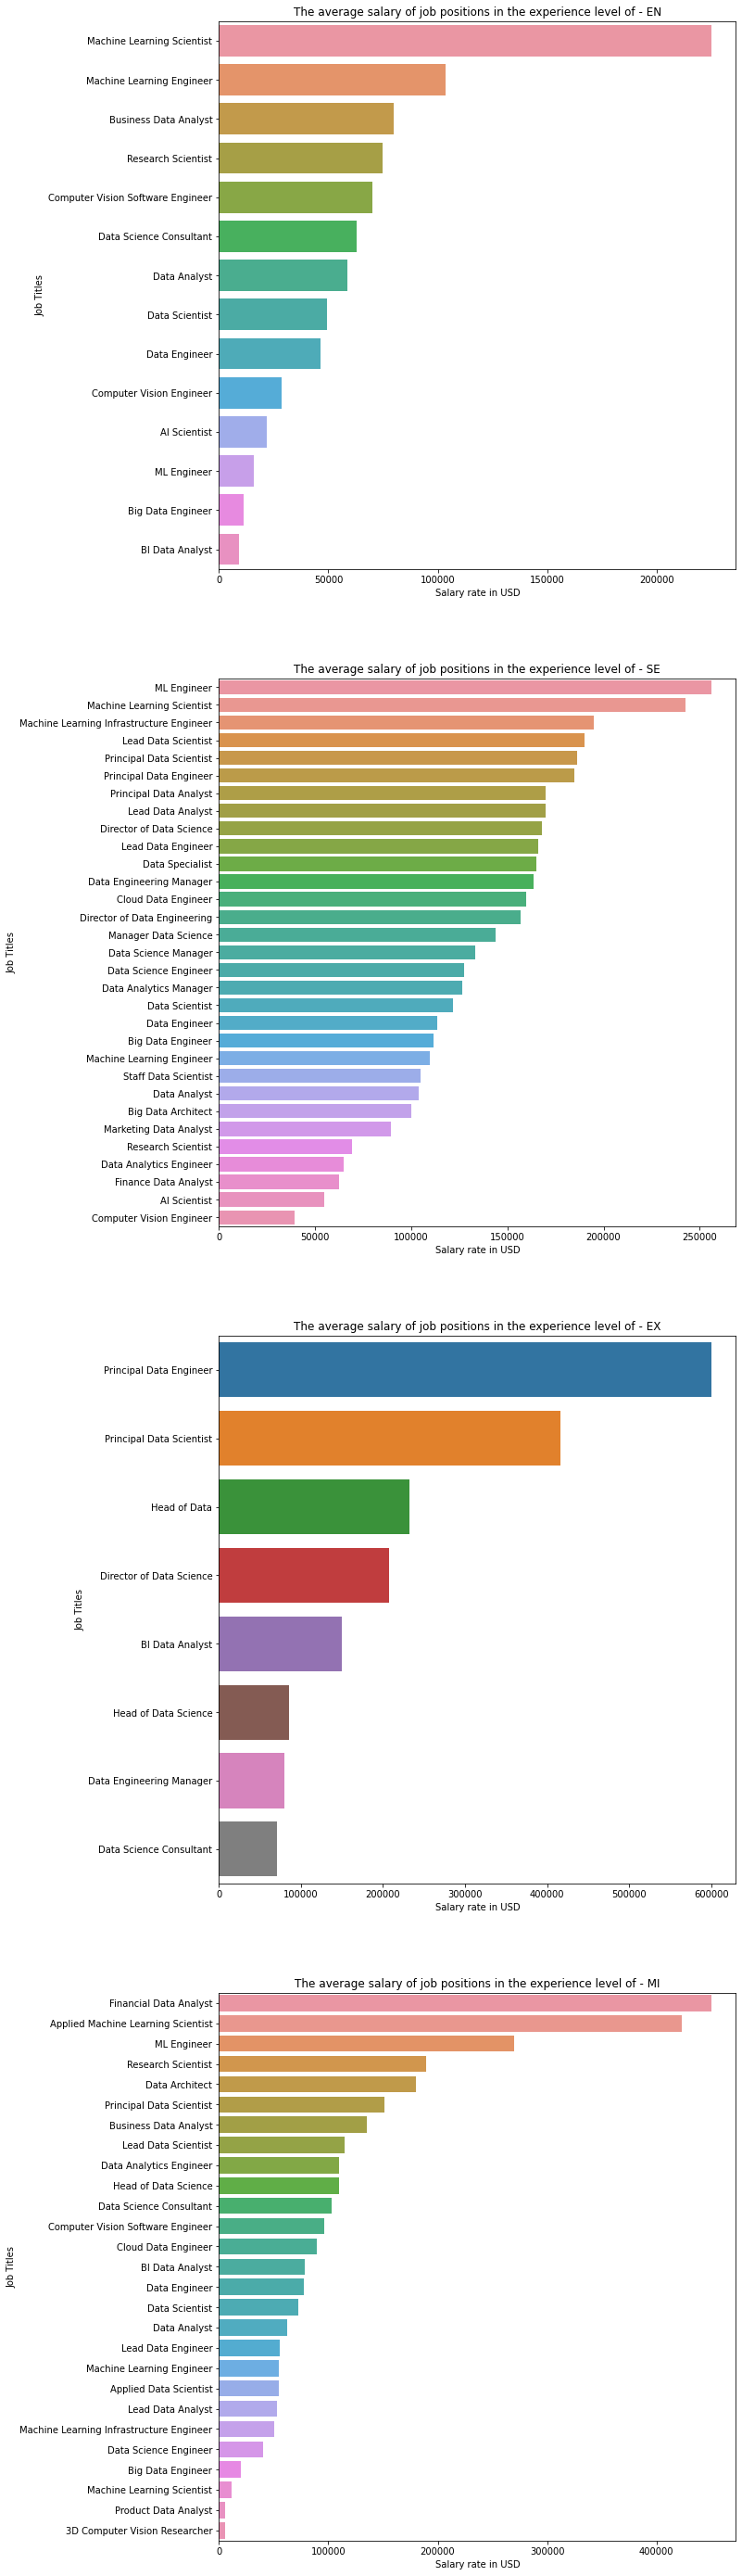

In [40]:
fig, ax = plt.subplots(4, 1, figsize=(10, 50));

for exp, axe in zip(unique_exp_lvl, ax):
    ex = experience_data['experience_level'].isin([exp])
    new_exp_data = experience_data[ex]
    grouped_exp_data = new_exp_data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
    job_title3 = [ title3 for title3 in grouped_exp_data.index ]
    sns.barplot(x=grouped_exp_data, y=job_title3, ax=axe)
    axe.set_title(f'The average salary of job positions in the experience level of - {exp}')
    axe.set_xlabel("Salary rate in USD")
    axe.set_ylabel("Job Titles")